# <center> Analisis Tren dan Pola Belanja di Istanbul Periode 2021-2022 </center>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
data = pd.read_csv('customer_shopping_data.csv')
data.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


<b>Observation :

1. Data terdiri dari 99457 baris dan 10 kolom.
2. Tidak ada data yang kosong.
3. Tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai).
4. Kolom `invoice_date` tipe datanya masih object, akan diubah ke tipe data datetime.

# Data Cleaning

## Cek Missing Value

In [4]:
data.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Tidak ada data yang kosong.

## Cek Data Duplikat

In [5]:
data.duplicated().sum()

0

Tidak ada data yang duplikat. Sehingga setiap baris sudah mewakili setiap transaksi pembelanjaan dan dengan customer yang berbeda.

In [6]:
data1 = data.copy()
data.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# Merubah Tipe data

In [7]:
data1['invoice_date'] = pd.to_datetime(data1['invoice_date'], dayfirst = True)
data1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


# Drop Feature yang tidak diperlukan

In [8]:
data1.drop('customer_id', axis = 1, inplace = True)

# Feature Engineering

In [9]:
# Membuat feature total transaksi
data1['total_payment'] = data1['quantity'] * data1['price']

In [10]:
# Mengurai kolom "invoice_date" menjadi tahun, bulan, dan hari

# tanggal
day_mapping = {
               0 : 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'
                }
data1['day'] = data1['invoice_date'].dt.dayofweek.map(day_mapping)

# bulan
data1['month'] = data1['invoice_date'].dt.month

#tahun
data1['year'] = data1['invoice_date'].dt.year

In [11]:
data1.drop('invoice_date', axis = 1, inplace = True)

In [12]:
# Membuat kolom kategori usia

list = []

for i in data1['age']:
    if i>= 0  and i <= 1:
        age_category = 'Infant'
    elif i>1 and i <= 4:
        age_category = 'Toddler'
    elif i > 4 and i<= 12:
        age_category = 'Child'
    elif i > 12 and i<= 19:
        age_category = 'Teen'
    elif i > 19 and i<= 39:
        age_category = 'Adult'
    elif i > 39 and i<= 59:
        age_category = 'Middle Age'
    else:
        age_category = 'Senior Adult'
    list.append(age_category)

data1['age_category'] = list

data1.head()

,invoice_no,gender,age,category,quantity,price,payment_method,shopping_mall,total_payment,day,month,year,age_category
0,I138884,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,7502.00,Friday,8,2022,Adult
1,I317333,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,Sunday,12,2021,Adult
2,I127801,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,Tuesday,11,2021,Adult
3,I173702,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,15004.25,Sunday,5,2021,Senior Adult
4,I337046,Female,53,Books,4,60.60,Cash,Kanyon,242.40,Sunday,10,2021,Middle Age


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99457 non-null  int64  
 3   category        99457 non-null  object 
 4   quantity        99457 non-null  int64  
 5   price           99457 non-null  float64
 6   payment_method  99457 non-null  object 
 7   shopping_mall   99457 non-null  object 
 8   total_payment   99457 non-null  float64
 9   day             99457 non-null  object 
 10  month           99457 non-null  int32  
 11  year            99457 non-null  int32  
 12  age_category    99457 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 9.1+ MB


In [14]:
data1['month'] = data1['month'].astype(object)
data1['year'] = data1['year'].astype(object)

In [15]:
data2 = data1.copy()

# Filter Data

In [16]:
data2['year'].unique()

array([2022, 2021, 2023], dtype=object)

In [17]:
data2023 = data2[['year','month']][(data2['year']==2023)]
data2023['month'].max()

3

Karena pada tahun 2023 belum lengkap (dalam data ini hanya sampai bulan Maret), maka tahun yang akan dianalisa adalah tahun 2021 dan 2022

In [18]:
# Filter data tahun 2021 dan 2022
data2 = data1[(data1['year'] == 2021) | (data1['year'] == 2022)]

In [19]:
data2.shape

(90933, 13)

In [20]:
# Memisahkan kolom Numerik dan Kategorik
num = []
cat = []

for i in data2.columns:
    if data2[i].dtypes == "object":
        cat.append(i)
    else:
        num.append(i)

# Statistic Descriptive

In [21]:
data2.describe()

,age,quantity,price,total_payment
count,90933.000000,90933.000000,90933.000000,90933.000000
mean,43.432978,3.004883,689.399127,2529.306024
std,14.990631,1.412633,940.241364,4218.831875
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,136.350000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


<b>Observation:<b>
1. Customer tertua berusia 69 tahun, sedangkan customer termuda berusia 18 tahun.
2. Rata-rata customer yang berbelanja berusia 43 tahun.
3. Rata-rata barang yang dibeli dalam 1 struk ada 3 item.
4. Total belanjaan paling banyak sebesar 26250 lira, sedangkan paling sedikit sebesar 5.23 lira.
5. Rata-rata total pembelanjaan sebesar 2529.31 lira

In [22]:
data2[cat].describe()

,invoice_no,gender,category,payment_method,shopping_mall,day,month,year,age_category
count,90933,90933,90933,90933,90933,90933,90933,90933,90933
unique,90933,2,8,3,10,7,12,2,4
top,I138884,Female,Clothing,Cash,Mall of Istanbul,Friday,7,2022,Adult
freq,1,54348,31533,40621,18228,13196,7877,45551,35254


<b>Insight: <br>
    
Customer didominasi (proporsi >50% dari baris data) oleh gender female.

In [23]:
for i in cat:
    print(f'''Value Count Column {i}:''')
    print(data2[i].value_counts())
    print('----'*10, '\n')

Value Count Column invoice_no:
invoice_no
I138884    1
I197173    1
I928841    1
I177821    1
I309487    1
          ..
I212097    1
I124665    1
I205431    1
I176919    1
I232867    1
Name: count, Length: 90933, dtype: int64
---------------------------------------- 

Value Count Column gender:
gender
Female    54348
Male      36585
Name: count, dtype: int64
---------------------------------------- 

Value Count Column category:
category
Clothing           31533
Cosmetics          13751
Food & Beverage    13533
Toys                9253
Shoes               9185
Technology          4573
Souvenir            4571
Books               4534
Name: count, dtype: int64
---------------------------------------- 

Value Count Column payment_method:
payment_method
Cash           40621
Credit Card    31932
Debit Card     18380
Name: count, dtype: int64
---------------------------------------- 

Value Count Column shopping_mall:
shopping_mall
Mall of Istanbul     18228
Kanyon               18099
Metro

<b>Observation : <br>

Tidak ditemukan value yang mencurigakan.

# Analysis

## Univariate Analysis

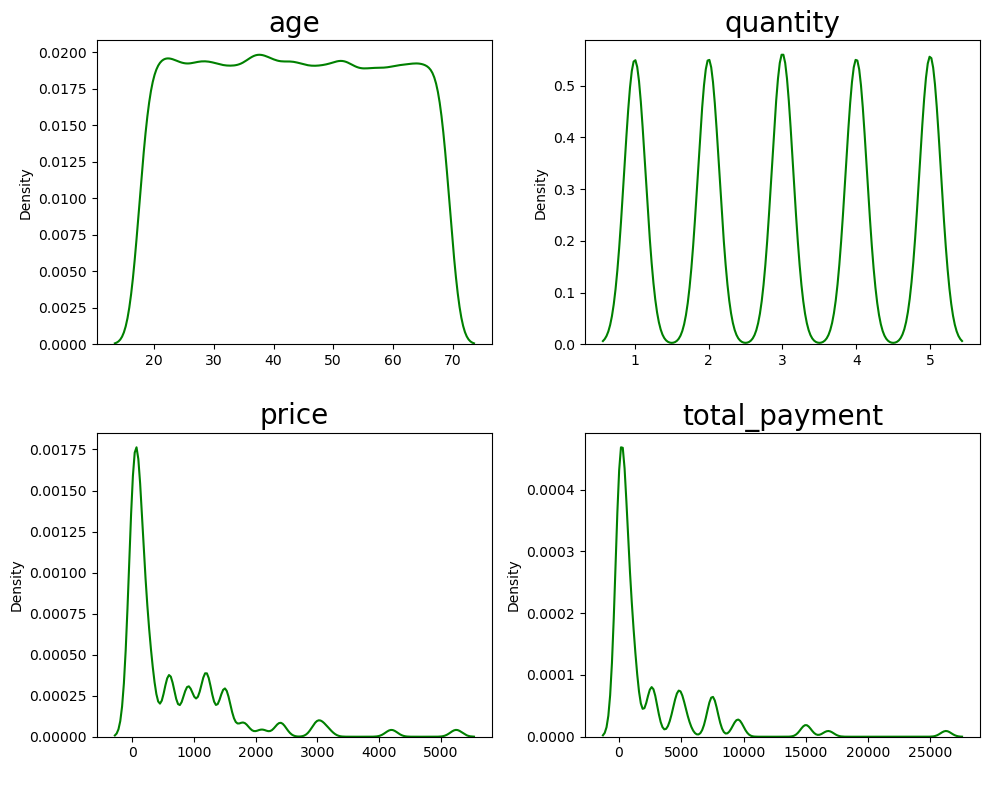

In [24]:
plt.figure(figsize = (10,8))

for i in range(len(num)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x = data2[num[i]], color = 'green')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

Text(600, 0.00125, 'Banyak customer membeli barang dengan harga barang dibawah 1000')

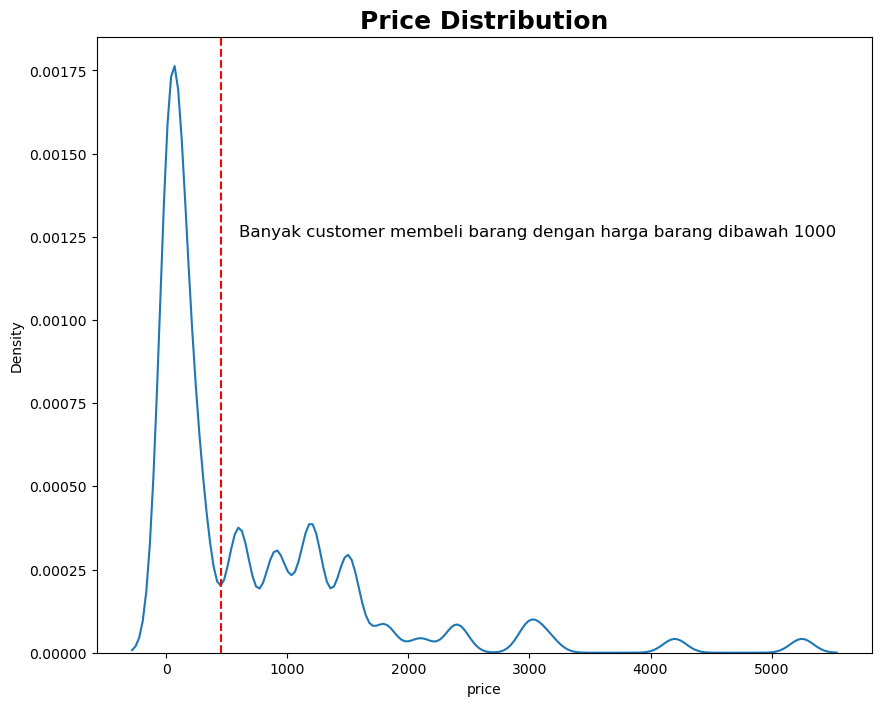

In [25]:
plt.figure(figsize=(10,8))
sns.kdeplot(x = 'price', data = data2)
plt.axvline(x = 450, color='red', linestyle='--')
plt.title('Price Distribution', fontsize=18,fontweight='bold')
plt.text(600, 0.00125, s='Banyak customer membeli barang dengan harga barang dibawah 1000', fontsize=12)

Text(4000, 0.0003, 'Banyak customer memiliki total belanjaan dibawah 5000')

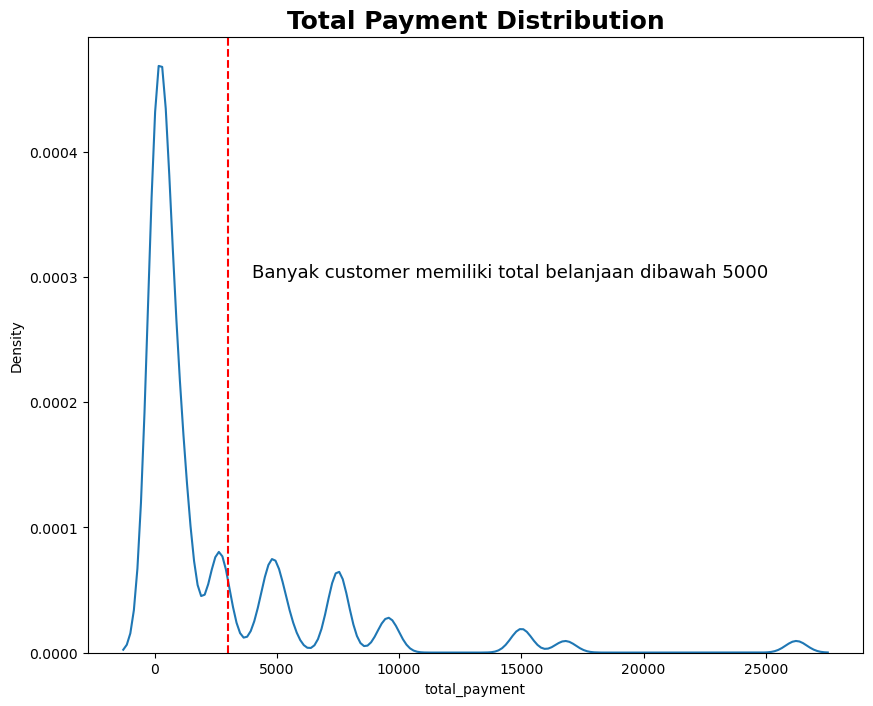

In [26]:
plt.figure(figsize=(10,8))
sns.kdeplot(x = 'total_payment', data = data2)
plt.axvline(x = 3000, color='red', linestyle='--')
plt.title('Total Payment Distribution', fontsize=18,fontweight='bold')
plt.text(4000, 0.0003, s='Banyak customer memiliki total belanjaan dibawah 5000', fontsize=13)

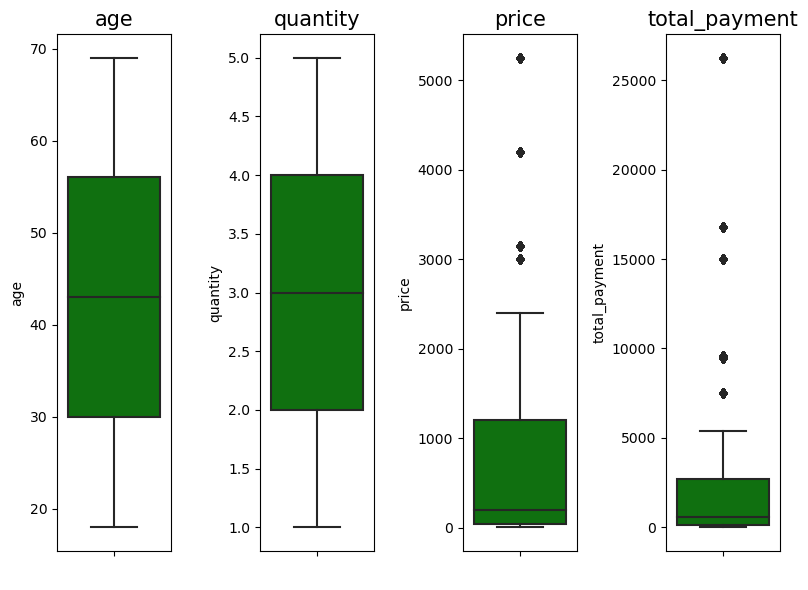

In [27]:
plt.figure (figsize = (8,6))

for i in range(len(num)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y = data2[num[i]], color = 'green', orient = 'v')
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

<b>Insight: <br>
    
Pada kolom "price" dan "total_payment" terdapat outlier, dimana ini berarti ada value-value yang nilainya jauh dari sebaran data yang lain. Pada kasus ini, outlier tidak akan dihapus karena berguna untuk analisa.

In [28]:
cat

['invoice_no',
 'gender',
 'category',
 'payment_method',
 'shopping_mall',
 'day',
 'month',
 'year',
 'age_category']

### Transactions by Gender

In [29]:
gender_percentage = data2['gender'].value_counts().reset_index()
gender_percentage.columns = ['value','total']
gender_percentage['percentage'] = round((gender_percentage['total']/len(data1))*100,2)
gender_percentage

,value,total,percentage
0,Female,54348,54.64
1,Male,36585,36.78


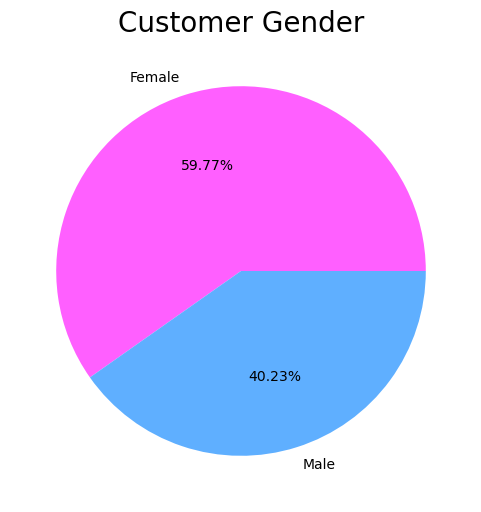

In [30]:
plt.figure (figsize = (6,6))

labels = ['Female','Male']
colors = ['#ff5fff','#5fafff']


# define Seaborn color palette to use
palette_color = sns.color_palette(colors)

# plotting data on chart
plt.pie(gender_percentage['total'], labels=labels, colors=palette_color, autopct='%.2f%%')

plt.title('Customer Gender', fontsize = 20)

# displaying chart
plt.show()

#### Insight :   
Dari chart di atas dapat dilihat bahwa customer dari 10 mall yang ada di Istanbul didominasi oleh wanita yaitu sebesar 59.77%, sedangkan pria sebesar 40.23%

### Total Expenses by Gender

In [31]:
gender_payment = data2.groupby(['gender'])['total_payment'].sum().sort_values(ascending = False).reset_index()
gender_payment

,gender,total_payment
0,Female,1.374543e+08
1,Male,9.254309e+07


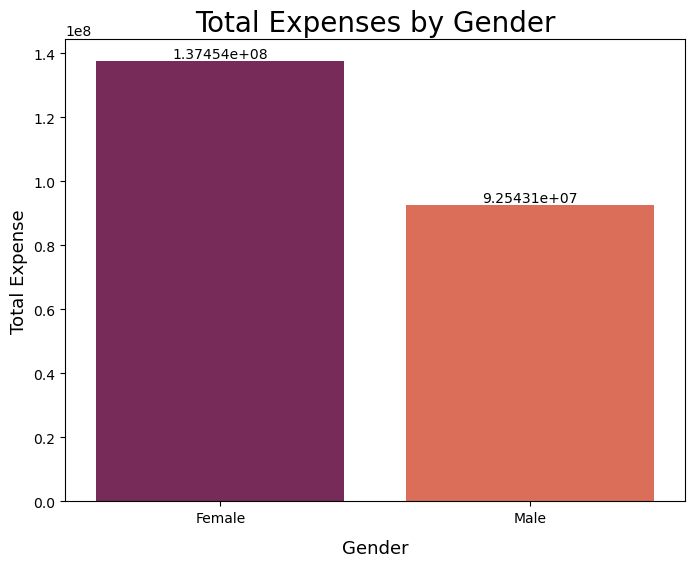

In [32]:
plt.figure(figsize=(8,6))

gender = sns.barplot(y = 'total_payment', x = 'gender', data = gender_payment, palette = 'rocket')

plt.title('Total Expenses by Gender', size = 20)


plt.xlabel('Gender', labelpad = 10, size = 13)
plt.ylabel('Total Expense', size = 13)

for label in gender.containers:
    gender.bar_label(label)

<b> Insight : <br>
Total belanjaan atau total expense paling banyak berasal dari Wanita

### Age Category Transaction by Gender

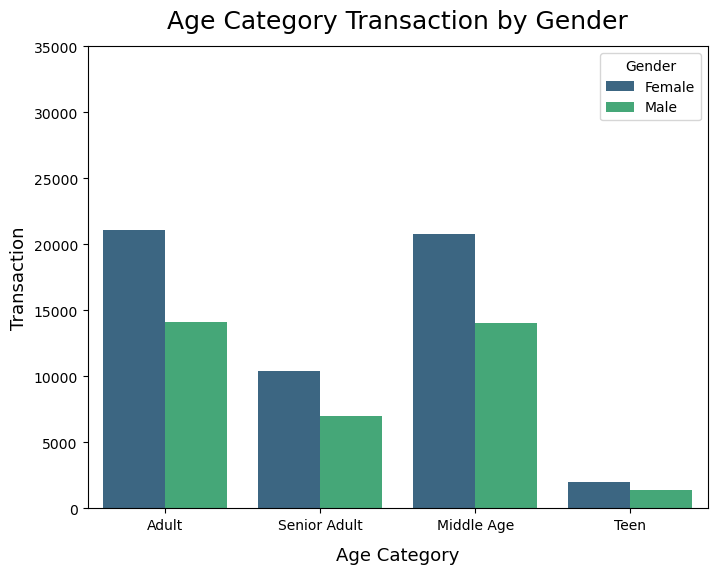

In [33]:
plt.figure(figsize = (8,6))

pay_gen = sns.countplot(x = 'age_category', data = data2, hue = 'gender', palette = 'viridis')

plt.legend(loc = 0 ,title = 'Gender', title_fontsize = 10)

plt.xlabel('Age Category', labelpad = 10, size = 13)
plt.ylabel('Transaction', size = 13)
plt.ylim(0,35000)

plt.title('Age Category Transaction by Gender', size = 18, pad = 13)

plt.show()


<b> Insight : <br>
Kategori usia pada customer, semuanya didominasi oleh Wanita.

### Transaction by Category

In [34]:
category_count = data2.groupby('category')['invoice_no'].nunique().reset_index(name = 'jumlah_order')
category_count.columns = ['category','jumlah_order']
category_count['percentage'] = round((category_count['jumlah_order']/len(data2))*100,2)
category_count = category_count.sort_values('jumlah_order', ascending = False).reset_index(drop = True)
category_count

,category,jumlah_order,percentage
0,Clothing,31533,34.68
1,Cosmetics,13751,15.12
2,Food & Beverage,13533,14.88
3,Toys,9253,10.18
4,Shoes,9185,10.10
5,Technology,4573,5.03
6,Souvenir,4571,5.03
7,Books,4534,4.99


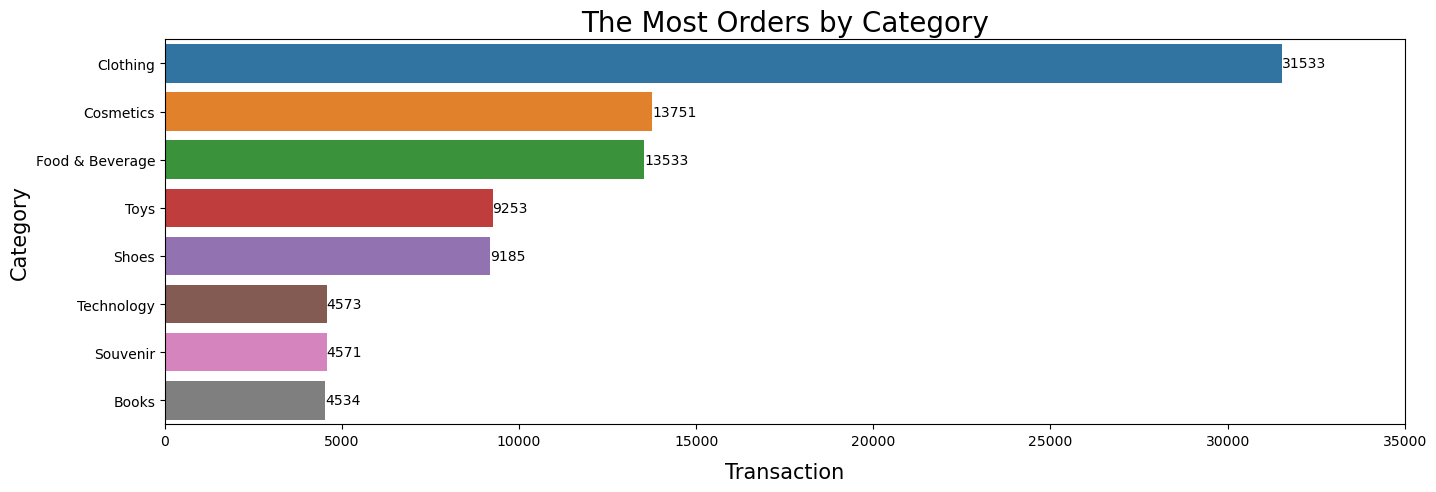

In [35]:
plt.figure(figsize=(16,5))

x = category_count['jumlah_order']
y = category_count['category']

category = sns.barplot(y = y, x = x, data = category_count)

plt.title('The Most Orders by Category', size = 20)

plt.xlim(0,35000)
plt.xlabel('Transaction', labelpad = 10, size = 15)
plt.ylabel('Category', size = 15)

for label in category.containers:
    category.bar_label(label)

<b> Insight :
1. Category 'clothing' paling banyak dibeli. Pembeliannya sangat berbeda jauh dengan category lainnya. Bahkan pembeliannya 2x lipat daripada category 'cosmetics'.
2. Category'buku' paling sedikit dibeli. Namun, tidak berbeda jauh dengan category 'technology' dan 'souvenir'.

### The Most Frequently Used Payment Method

In [36]:
payment_count = data2.groupby('payment_method')['invoice_no'].nunique().reset_index(name = 'jumlah_transaksi')
payment_count.columns = ['payment_method','jumlah_transaksi']
payment_count['percentage'] = round((payment_count['jumlah_transaksi']/len(data2))*100,2)
payment_count

,payment_method,jumlah_transaksi,percentage
0,Cash,40621,44.67
1,Credit Card,31932,35.12
2,Debit Card,18380,20.21


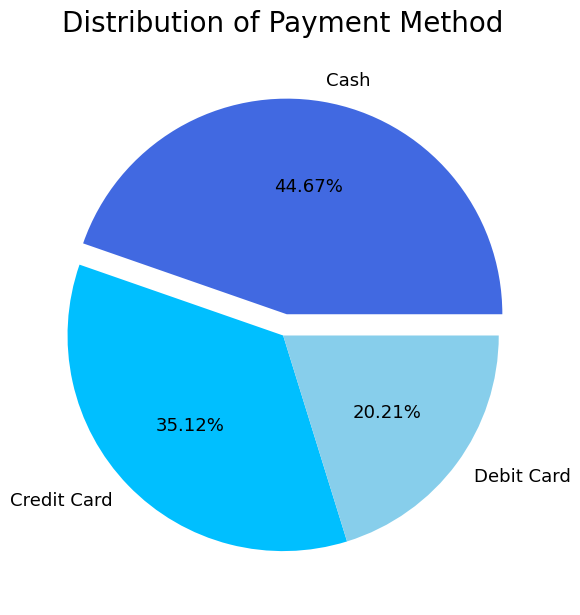

In [37]:
plt.figure (figsize = (7,7))

colors = ['royalblue','deepskyblue','skyblue']

# declaring exploding pie
explode = [0.1,0,0]

# define Seaborn color palette to use
palette_color = sns.color_palette(colors)

# plotting data on chart
plt.pie(payment_count['percentage'], labels = payment_count['payment_method'], colors = palette_color,explode = explode,
        textprops={'fontsize': 13}, autopct='%.2f%%')

plt.title('Distribution of Payment Method', fontsize = 20, pad = 25)

# displaying chart
plt.show()

<b>Insight :

Metode pembayaran yang paling sering digunakan adalah dengan cash, yaitu sebanyak 44,67% dari total transaksi. Sedangkan yang paling sedikit digunakan adalah dengan debit card yaitu sebanyak 20,21%.

### The Number of Transactions in each Mall

In [38]:
mall_count = data2.groupby('shopping_mall')['invoice_no'].nunique().reset_index(name = 'jumlah_order')
mall_count.columns = ['mall','jumlah_transaksi']
mall_count = mall_count.sort_values('jumlah_transaksi', ascending = False).reset_index(drop = True)
mall_count

,mall,jumlah_transaksi
0,Mall of Istanbul,18228
1,Kanyon,18099
2,Metrocity,13746
3,Metropol AVM,9292
4,Istinye Park,8940
5,Zorlu Center,4611
6,Cevahir AVM,4596
7,Forum Istanbul,4534
8,Viaport Outlet,4506
9,Emaar Square Mall,4381


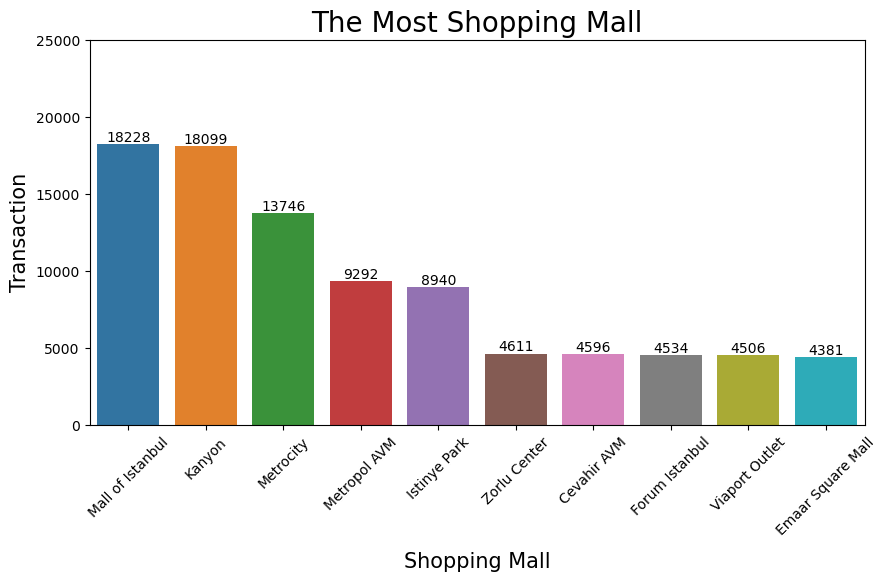

In [39]:
plt.figure(figsize=(10,5))

x = mall_count['mall']
y = mall_count['jumlah_transaksi']

mall = sns.barplot(x = x, y = y, data = mall_count)

plt.title('The Most Shopping Mall', size = 20)

plt.xticks(rotation=45)

plt.xlabel('Shopping Mall', labelpad = 10, size = 15)
plt.ylabel('Transaction', size = 15)
plt.ylim(0,25000)

for label in mall.containers:
    mall.bar_label(label)

plt.show()

<b>Insight:
1. 'Mall of Istanbul' memiliki transaksi pembelanjaan terbanyak di bandingkan dengan mall yang lainnya, yaitu sebanyak 18228 transaksi. Namun, jumlah transaksi di mall tersebut tidak berbeda jauh dengan 'Kanyon Mall' yang memiliki transaksi sebanyak 18099.
2. Transaksi di mall 'Zorlu Center', 'Cevahir AVM', 'Forum Istanbul', 'Viaport Outlet', dan 'Emaar Square Mall' tidak terlalu jauh. Namun paling sedikit ada di 'Emaar Square Mall'

### Favorite Mall to Spending Money

In [40]:
mall_income = data2.groupby('shopping_mall')['total_payment'].sum().sort_values(ascending = False).reset_index()
mall_income

,shopping_mall,total_payment
0,Mall of Istanbul,46679518.73
1,Kanyon,46090416.38
2,Metrocity,33910312.42
3,Metropol AVM,23171326.33
4,Istinye Park,22623096.84
5,Zorlu Center,11687856.67
6,Cevahir AVM,11590623.90
7,Viaport Outlet,11492879.05
8,Emaar Square Mall,11405338.16
9,Forum Istanbul,11346016.19


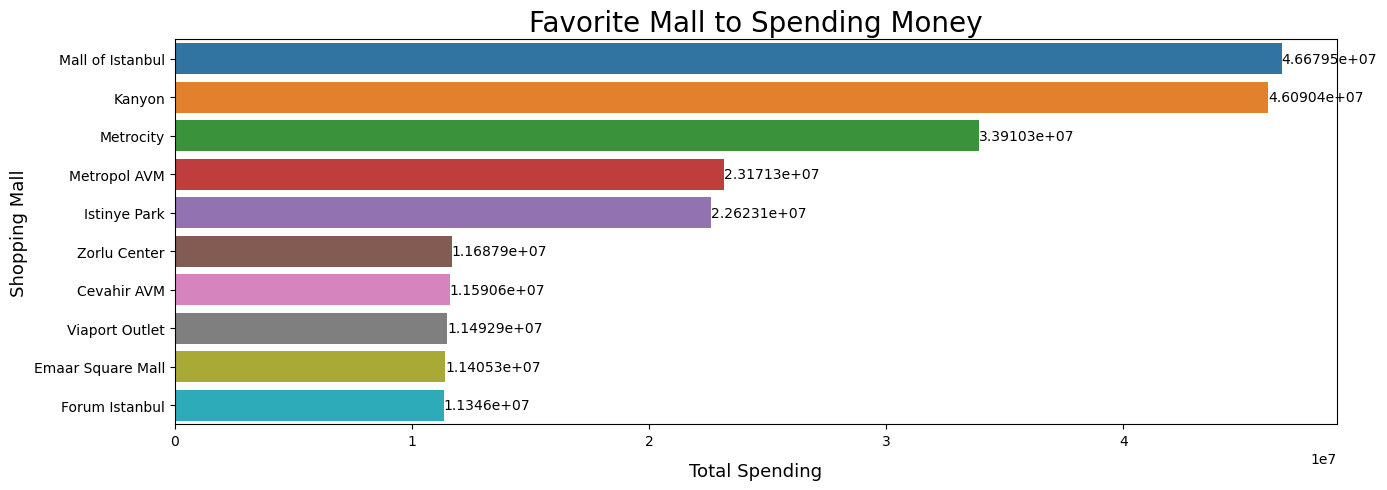

In [41]:
plt.figure(figsize=(15,5))

mall = sns.barplot(y = 'shopping_mall', x = 'total_payment', data = mall_income)

plt.title('Favorite Mall to Spending Money', size = 20)

#plt.xticks(rotation=45)

plt.xlabel('Total Spending', labelpad = 10, size = 13)
plt.ylabel('Shopping Mall', size = 13)
#plt.ylim(0,25000)

for label in mall.containers:
    mall.bar_label(label)

plt.show()

<b> Insight : <br>
Di antara 10 mall, Mall of Istanbul memiliki income yang paling banyak dibandingkan dengan Mall yang lain.

### Transactions by Age Category

In [42]:
data_age_cat = data2.copy()

In [43]:
ordered_age_cat = ['Infant','Toddler','Child','Teen', 'Adult', 'Middle Age', 'Senior Adult']
data_age_cat['age_category'] = pd.Categorical(data_age_cat['age_category'], categories = ordered_age_cat, ordered = True)

In [44]:
data_age_count = data2.groupby('age_category')['invoice_no'].nunique().reset_index(name = 'jumlah_order')
data_age_count.columns = ['age_category','jumlah_transaksi']
data_age_count['percentage'] = round((data_age_count['jumlah_transaksi']/len(data2))*100,2)
data_age_count = data_age_count.sort_values('jumlah_transaksi', ascending = False).reset_index(drop = True)
data_age_count

,age_category,jumlah_transaksi,percentage
0,Adult,35254,38.77
1,Middle Age,34817,38.29
2,Senior Adult,17406,19.14
3,Teen,3456,3.80


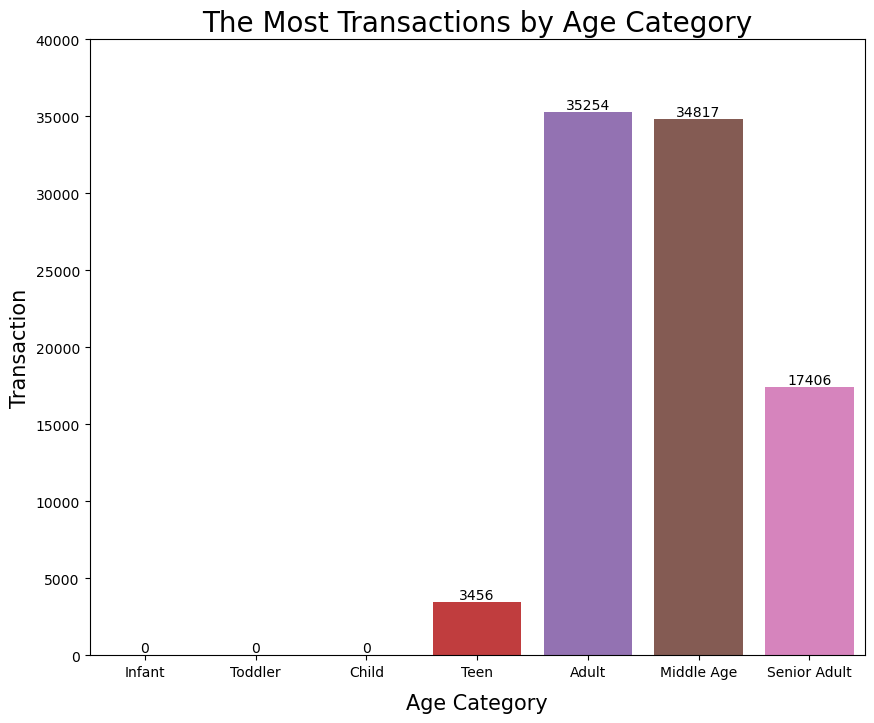

In [45]:
plt.figure(figsize=(10,8))

age_count = sns.countplot(x = 'age_category', data = data_age_cat)
for label in age_count.containers:
    age_count.bar_label(label)

plt.title('The Most Transactions by Age Category', size = 20)
plt.xlabel('Age Category', labelpad = 10, size = 15)
plt.ylabel('Transaction', size = 15)

plt.ylim(0,40000)
plt.show()

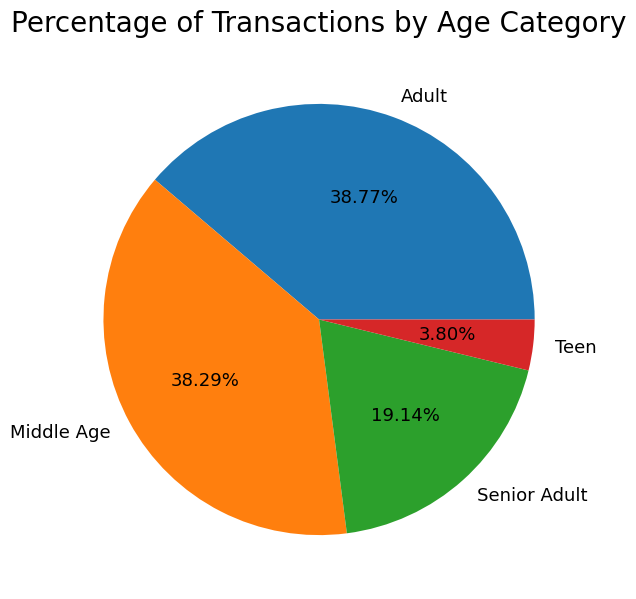

In [46]:
plt.figure (figsize = (7,7))

# plotting data on chart
plt.pie(data_age_count['percentage'], labels = data_age_count['age_category'],textprops={'fontsize': 13},
        autopct='%.2f%%')

plt.title('Percentage of Transactions by Age Category', fontsize = 20, pad = 13)

# displaying chart
plt.show()

<b>Insight:

Dari dua grafik di atas dapat dilihat bahwa transaksi pembelanjaan pada 10 mall di dominasi oleh customer dengan kategori usia adult dan middle age, yaitu sebanyak 35254 transaksi (38.77%) untuk kategori usia adult dan 34817 transaksi (38.29%) untuk kategori usia middle age. Sedangkan transaksi pembelanjaan paling sedikit dilakukan oleh kategori usia teen yaitu sebanyak 3456 transaksi (3.80%). Dengan demikian, transaksi pembelanjaan banyak dilakukan oleh usia produktif (orang-orang yang sudah dan sedang aktif bekerja).

### Day of Week Contribution

In [47]:
data_hari = data2.copy()

In [48]:
ordered_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
data_hari['day'] = pd.Categorical(data_hari['day'], categories = ordered_days, ordered = True)

(0.0, 16000.0)

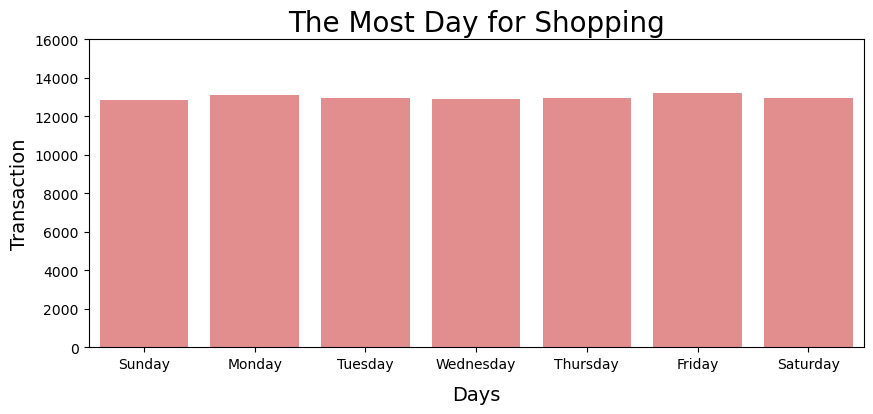

In [49]:
plt.figure(figsize=(10,4))

days = sns.countplot(x = 'day', data = data_hari, color = '#F08080')

plt.title('The Most Day for Shopping', size = 20)

plt.xlabel('Days', labelpad = 10, size = 14)
plt.ylabel('Transaction', size = 14)

plt.ylim(0,16000)

<b>Insight:
    
Dari grafik di atas dapat dilihat bahwa Senin sampai Minggu transaksi pembelanjaan hampir sama, cenderung stabil

### Transactions During 2021-2022

In [50]:
year_count = data2.groupby(['year'])['invoice_no'].nunique().reset_index(name = 'jumlah_order')
year_count = year_count.sort_values('jumlah_order', ascending = False).reset_index(drop = True)
year_count

,year,jumlah_order
0,2022,45551
1,2021,45382


Text(0, 0.5, 'Jumlah Transaksi')

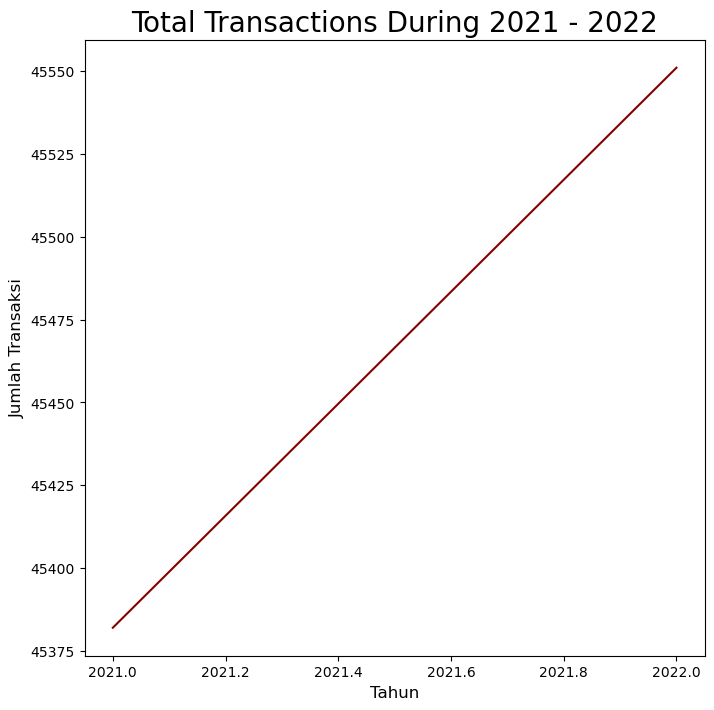

In [51]:
plt.figure(figsize=(8,8))

sns.lineplot(x = 'year', y= 'jumlah_order', data = year_count, color = '#870000')
plt.title('Total Transactions During 2021 - 2022', size = 20)
plt.xlabel('Tahun', size = 12)
plt.ylabel('Jumlah Transaksi', size = 12)

<b>Insight:
    
Dari grafik di atas dapat dilihat bahwa terjadi peningkatan transaksi dari tahun 2021 ke 2022.

# Bivariate Analysis

In [52]:
data2.head()

,invoice_no,gender,age,category,quantity,price,payment_method,shopping_mall,total_payment,day,month,year,age_category
0,I138884,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,7502.00,Friday,8,2022,Adult
1,I317333,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,Sunday,12,2021,Adult
2,I127801,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,Tuesday,11,2021,Adult
3,I173702,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,15004.25,Sunday,5,2021,Senior Adult
4,I337046,Female,53,Books,4,60.60,Cash,Kanyon,242.40,Sunday,10,2021,Middle Age


### Comparison of Payment Methods by Gender

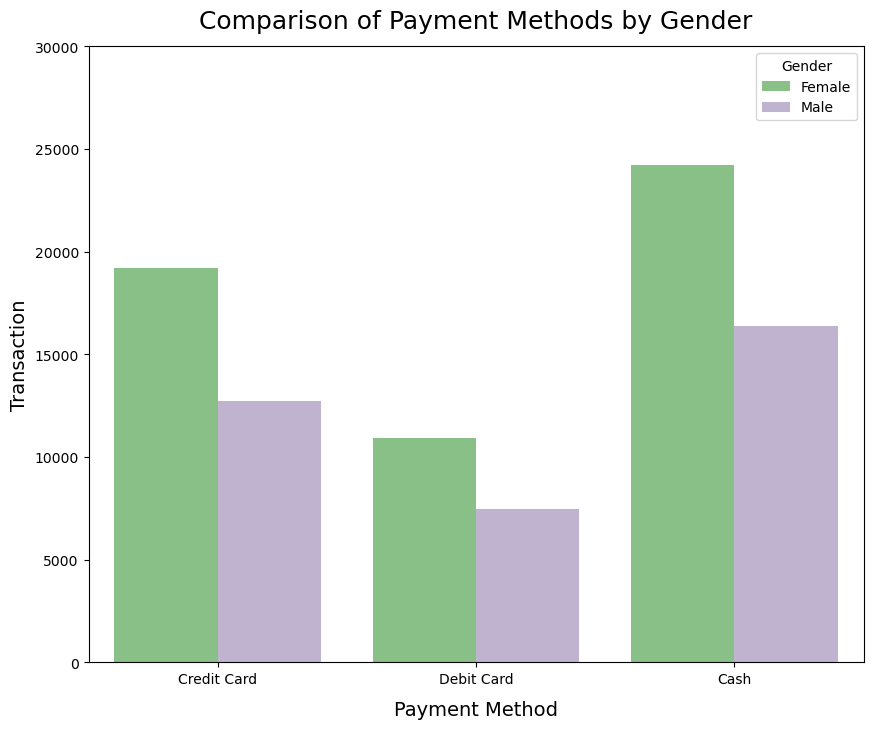

In [53]:
plt.figure(figsize = (10,8))

pay_gen = sns.countplot(x = 'payment_method', data = data2, hue = 'gender', palette = 'Accent')

plt.legend(loc = 0 ,title = 'Gender', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

plt.xlabel('Payment Method', labelpad = 10, size = 14)
plt.ylabel('Transaction', size = 14)

plt.ylim(0,30000)
plt.title('Comparison of Payment Methods by Gender', size = 18, pad = 13)

plt.show()


<b>Insight:
   
Metode pembayaran apapun didominasi oleh wanita.

### Category Transactions based on Age Category

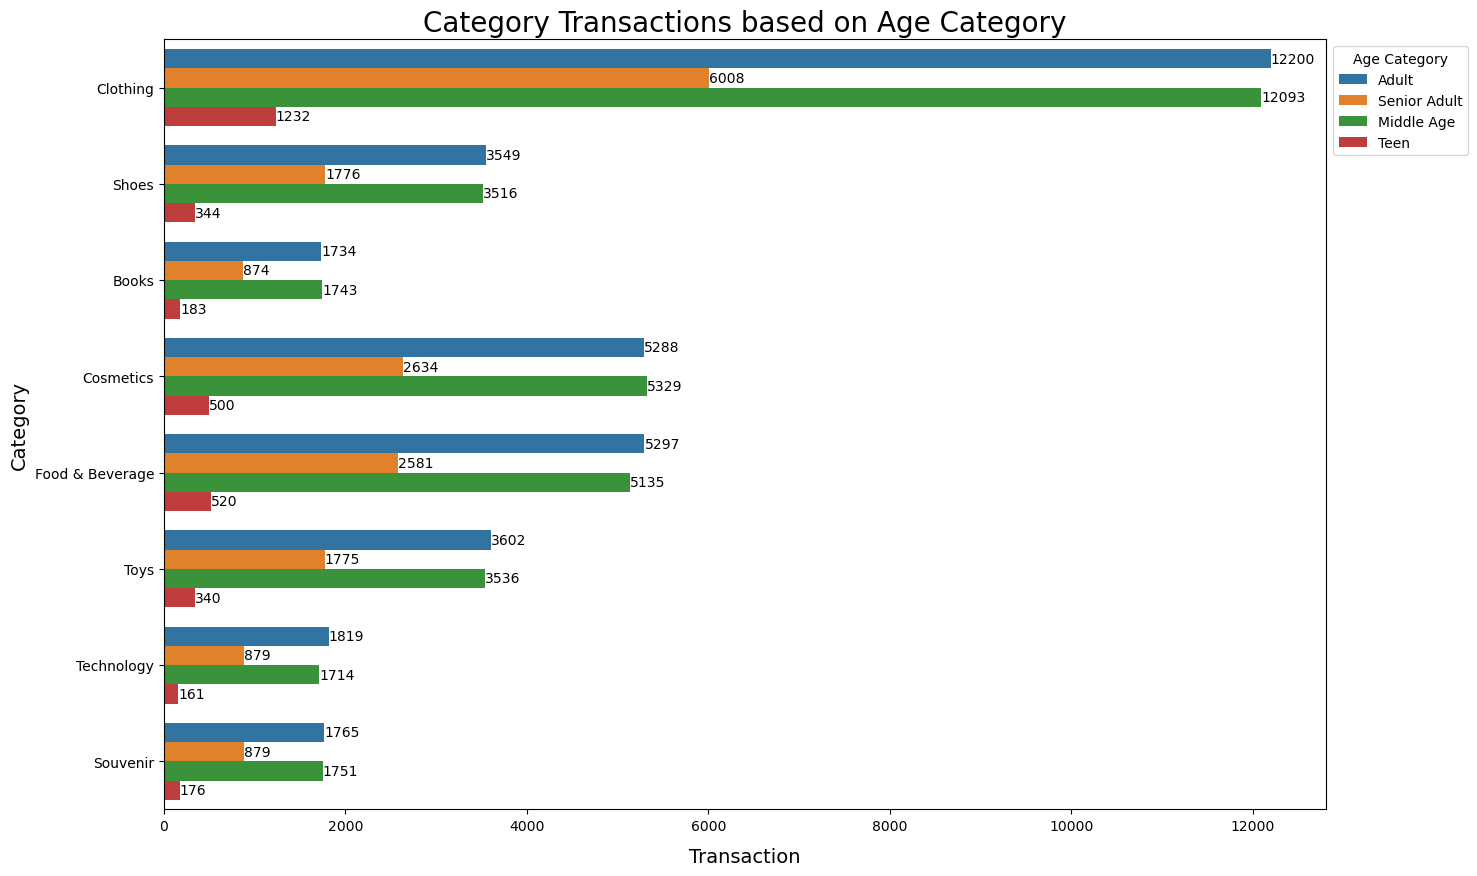

In [54]:
plt.figure(figsize=(15,10))

mall_gen = sns.countplot(y='category', data=data2, hue='age_category')

plt.legend(loc = 0 ,title = 'Age Category', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

for label in mall_gen.containers:
    mall_gen.bar_label(label)

plt.title('Category Transactions based on Age Category', size = 20)
plt.xlabel('Transaction', labelpad = 10, size = 14)
plt.ylabel('Category', size = 14)

plt.show()

<b> Insight : <br>
Transaksi di setiap category, didominasi oleh kategori usia `Adult` dan `Middle Age`. Namun hanya pada category `cosmetics`, kategori usia `Middle Age` lebih banyak melakukan transaksi daripada `Adult`.


### Total Expense per Category Based on Age Category

Text(0.5, 1.0, 'Total Expense per Category Based on Age Category')

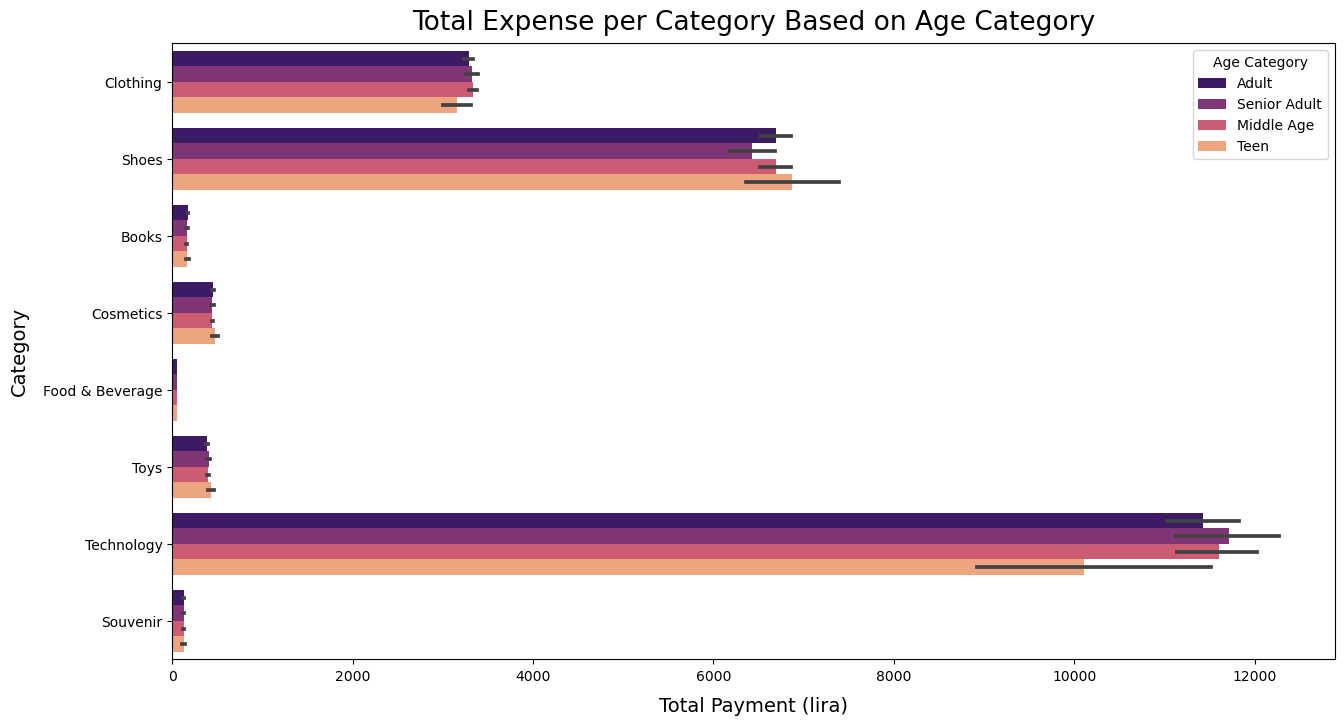

In [55]:
plt.figure(figsize = (15,8))
sns.barplot(data = data2, y = 'category', x = 'total_payment', hue = 'age_category', palette = 'magma')
plt.legend(loc = 0 ,title = 'Age Category', title_fontsize = 10, prop = {'size':10})

plt.ylabel('Category', size = 14, labelpad = 10)
plt.xlabel('Total Payment (lira)', size = 14, labelpad = 10)
plt.title('Total Expense per Category Based on Age Category',size=19, pad = 10)

### Transactions of Age Category based on Payment Method

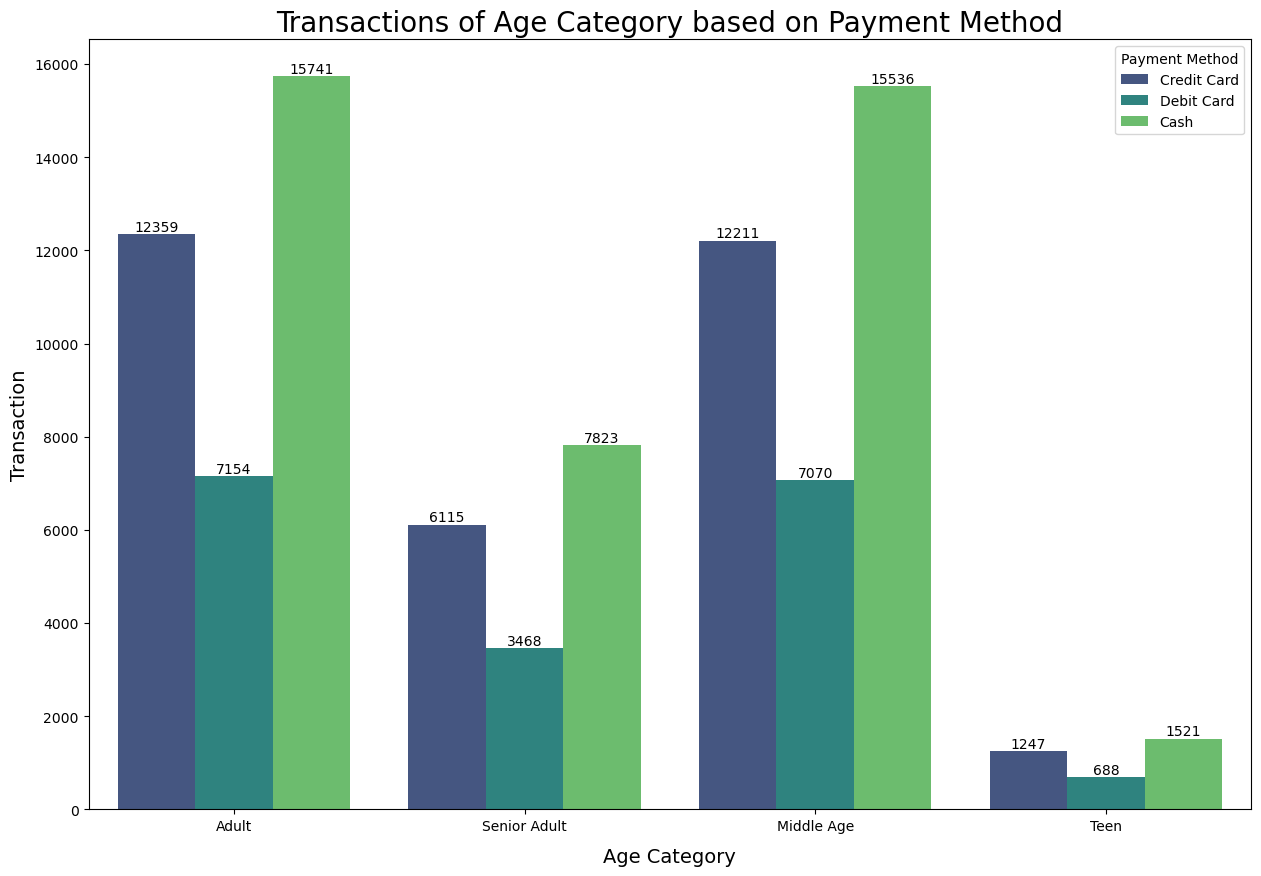

In [56]:
plt.figure(figsize=(15,10))

mall_gen = sns.countplot(x='age_category', data=data2, hue='payment_method', palette = 'viridis')

plt.legend(loc = 0 ,title = 'Payment Method', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

for label in mall_gen.containers:
    mall_gen.bar_label(label)

plt.title('Transactions of Age Category based on Payment Method', size = 20)
plt.xlabel('Age Category', labelpad = 10, size = 14)
plt.ylabel('Transaction', size = 14)

plt.show()

<b> Insight : <br>
Pada semua kategori usia, lebih memilih menggunakan metode pembayaran cash daripada credit card maupun debit card.

### Comparison Transactions of Category based on Payment Method

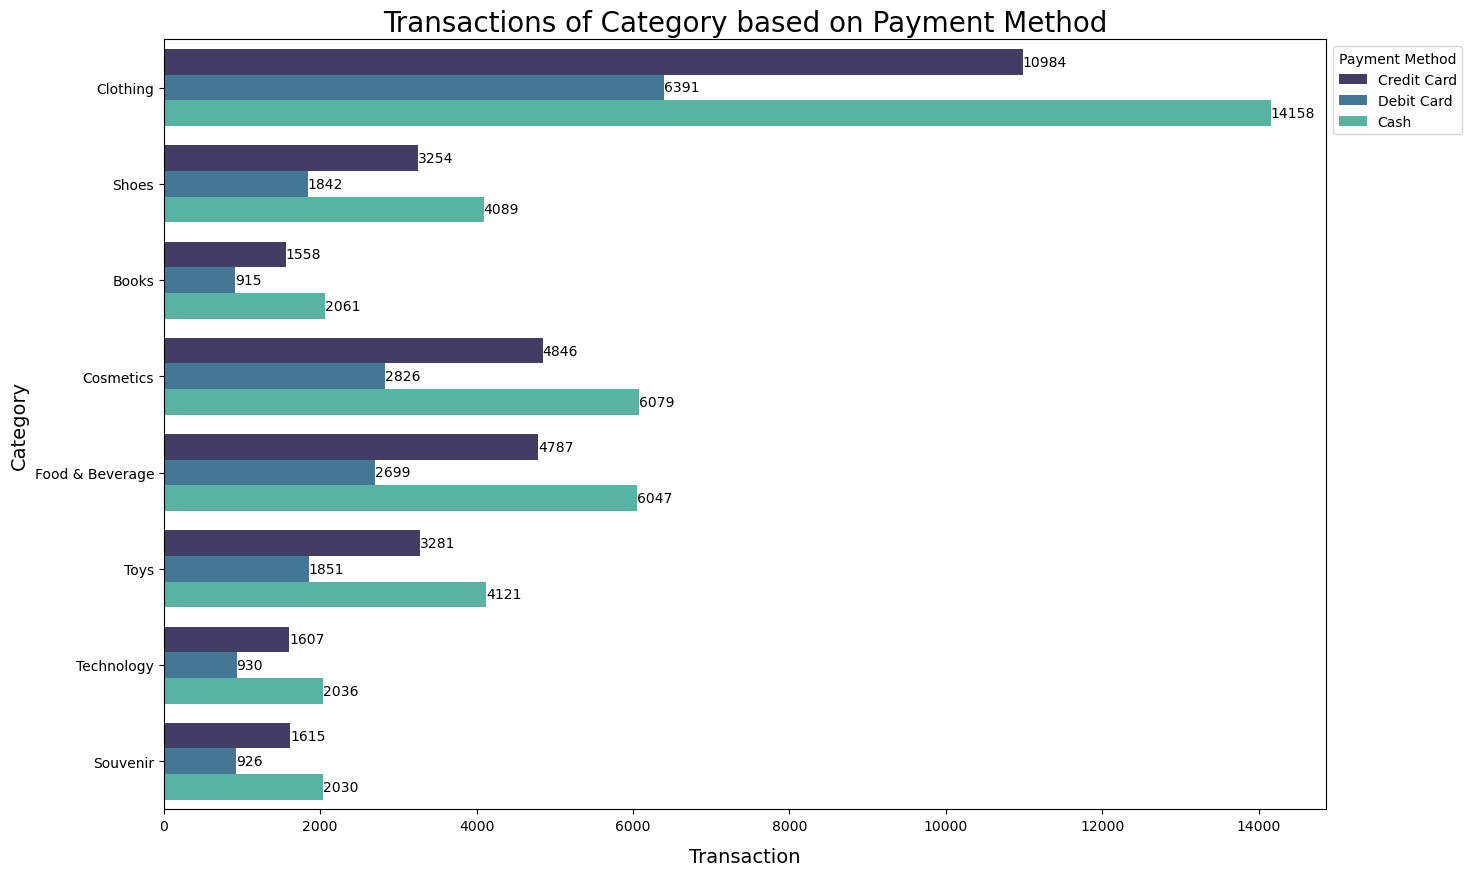

In [57]:
plt.figure(figsize=(15,10))

mall_gen = sns.countplot(y='category', data=data2, hue='payment_method', palette = 'mako')

plt.legend(loc = 0 ,title = 'Payment Method', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

for label in mall_gen.containers:
    mall_gen.bar_label(label)

plt.title('Transactions of Category based on Payment Method', size = 20)
plt.xlabel('Transaction', labelpad = 10, size = 14)
plt.ylabel('Category', size = 14)

plt.show()

<b> Insight : <br>
Transaksi category apapun, metode pembayaran yang menjadi favorit customer adalah dengan `Cash`, kemudian `Credit Card`, dan selanjutnya dengan `Debit Card`.


### Comparison of Transactions at Malls based on Gender

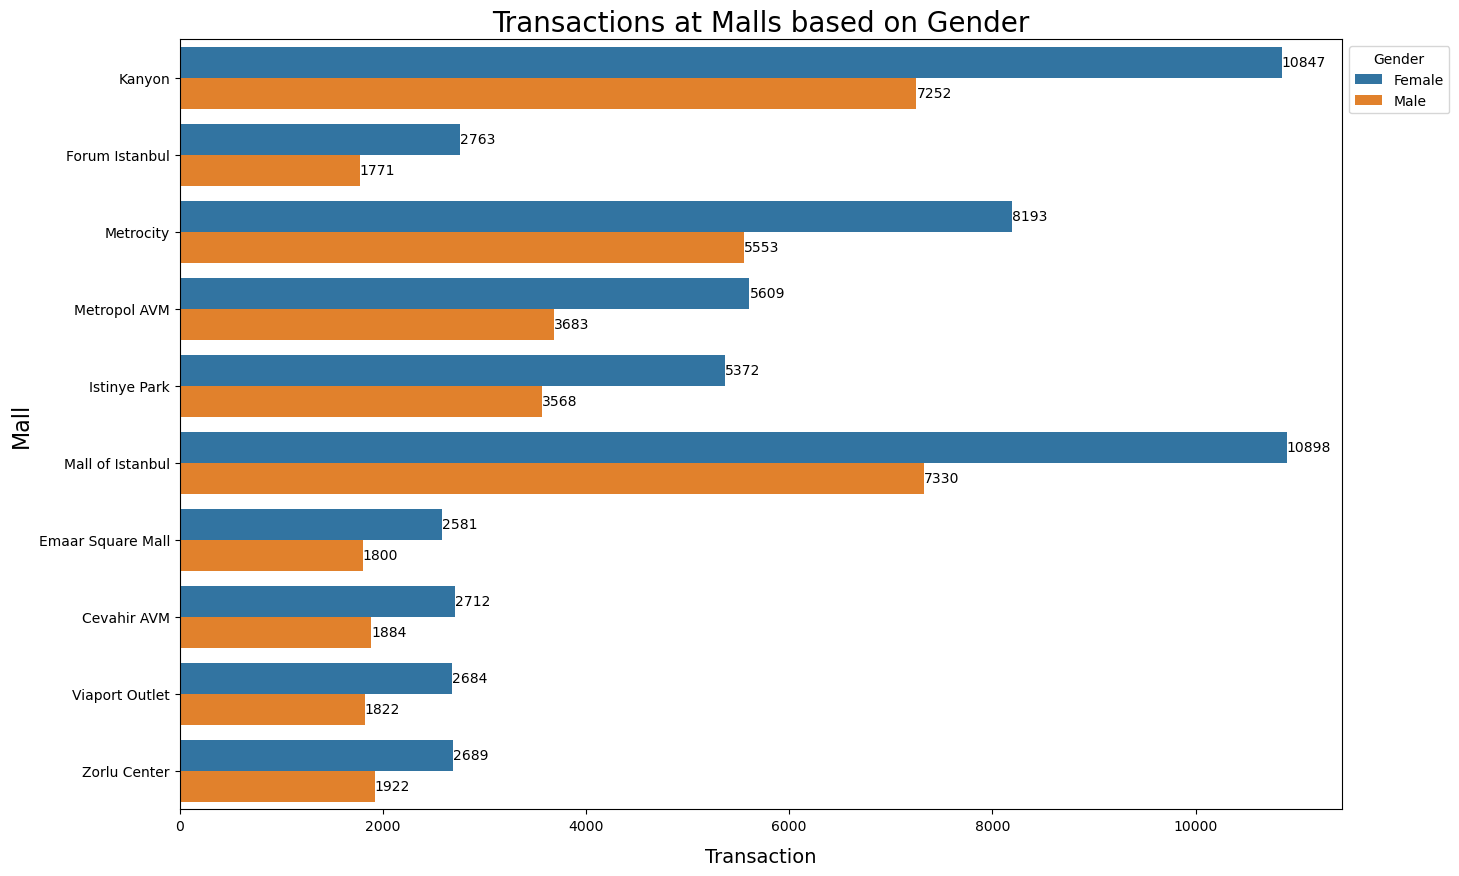

In [58]:
plt.figure(figsize=(15,10))

mall_gen = sns.countplot(y='shopping_mall', data=data2, hue='gender')

plt.legend(loc = 0 ,title = 'Gender', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

for label in mall_gen.containers:
    mall_gen.bar_label(label)

plt.title('Transactions at Malls based on Gender', size = 20)
plt.xlabel('Transaction', labelpad = 10, size = 14)
plt.ylabel('Mall', size = 16)

plt.show()

<b>Insight:
    
Dari semua mall yang ada, transaksi didominasi oleh wanita. Tidak ada satu mall yang didominasi oleh pria.

### Comparison of Total Transactions per Category by Year

In [59]:
data2_category_group = data2.groupby(['year','category']).agg({'invoice_no':'count'}).reset_index()
data2_category_group.columns = ['year','category','jumlah_transaksi']
data2_category_group

,year,category,jumlah_transaksi
0,2021,Books,2187
1,2021,Clothing,15973
2,2021,Cosmetics,6779
3,2021,Food & Beverage,6747
4,2021,Shoes,4594
5,2021,Souvenir,2270
6,2021,Technology,2257
7,2021,Toys,4575
8,2022,Books,2347
9,2022,Clothing,15560


Text(0, 0.5, 'Transaction')

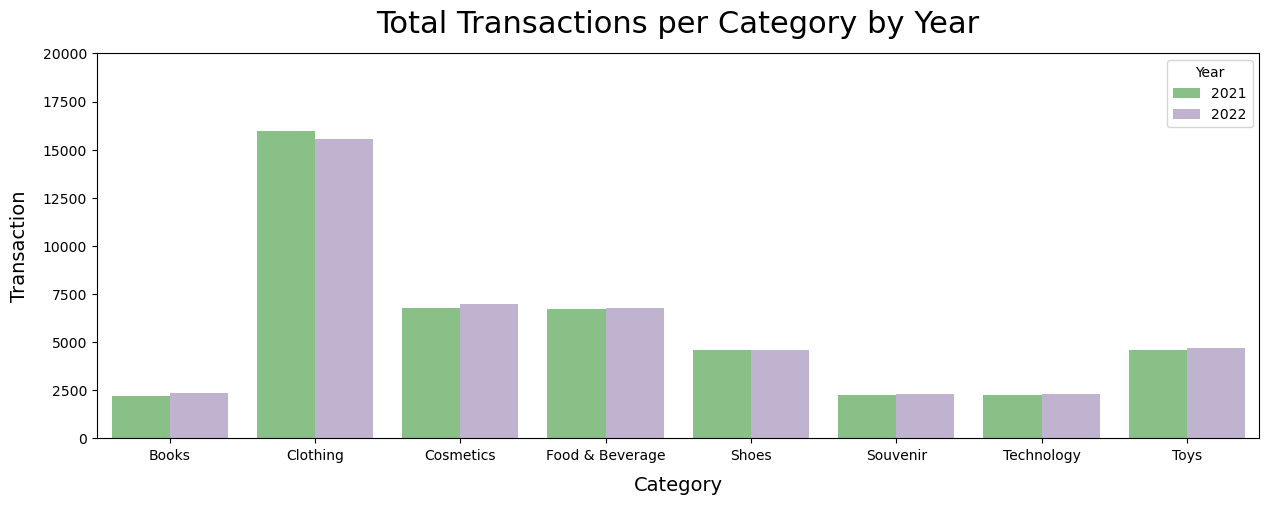

In [60]:
plt.figure(figsize = (15,5))

x = data2_category_group['category']
y = data2_category_group['jumlah_transaksi']

sns.barplot(data = data2_category_group, x = x, y = y, hue = 'year', palette='Accent')
plt.legend(title = 'Year')

plt.ylim(0,20000)
plt.title('Total Transactions per Category by Year', size = 22, pad = 15)
plt.xlabel('Category', size = 14, labelpad = 10)
plt.ylabel('Transaction', size = 14, labelpad = 10)



<b>Insight :

Dari semua kategori yang ada, kategori yang mengalami penurunan transaksi yang cukup terlihat penurunannya dari tahun 2021 ke 2022 adalah 'clothing'. Sedangkan untuk category 'books','cosmetics','toys' cukup terlihat terjadi kenaikan dari tahun 2021 ke 2022.

### Comparison of Total Transactions per Category by Month

In [61]:
data2_month = data2.copy()

In [62]:
data2_month = data2_month.groupby(['month','category'])['invoice_no'].nunique().reset_index(name = 'jumlah_transaksi')
data2_month

,month,category,jumlah_transaksi
0,1,Books,383
1,1,Clothing,2608
2,1,Cosmetics,1163
3,1,Food & Beverage,1106
4,1,Shoes,796
...,...,...,...
91,12,Food & Beverage,1174
92,12,Shoes,785
93,12,Souvenir,351
94,12,Technology,377


Text(0.5, 1.0, 'Total Transactions per Category by Month')

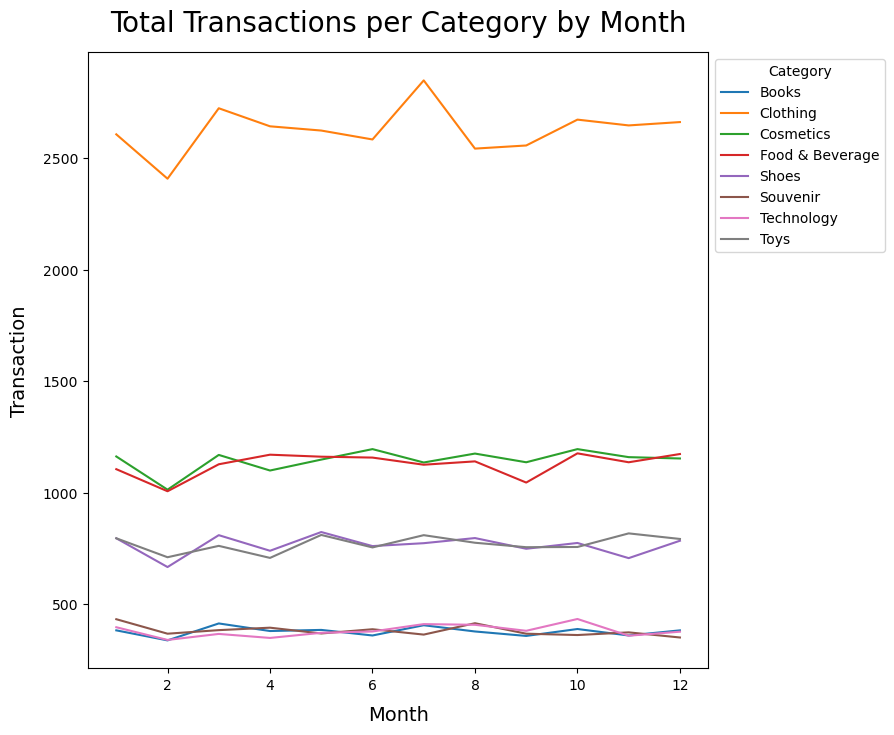

In [63]:
plt.figure(figsize = (8,8))
sns.lineplot(data = data2_month, x = 'month', y = 'jumlah_transaksi', hue = 'category')
plt.legend(loc = 0 ,title = 'Category', title_fontsize = 10,
          prop = {'size':10}, bbox_to_anchor = (1,1))
plt.xlabel('Month', size = 14, labelpad = 10)
plt.ylabel('Transaction', size = 14, labelpad = 10)
plt.title('Total Transactions per Category by Month', size = 20, pad = 15)

<b>Insight:

Transaksi pembelian pakaian mendominasi di setiap bulannya.

### Comparison of Total Transactions per Category Based on Gender

In [64]:
data2_cat_gender = data2.groupby(['category','gender'])['invoice_no'].nunique().reset_index(name = 'jumlah_transaksi')
data2_cat_gender

,category,gender,jumlah_transaksi
0,Books,Female,2621
1,Books,Male,1913
2,Clothing,Female,18899
3,Clothing,Male,12634
4,Cosmetics,Female,8238
5,Cosmetics,Male,5513
6,Food & Beverage,Female,8057
7,Food & Beverage,Male,5476
8,Shoes,Female,5465
9,Shoes,Male,3720


Text(0.5, 1.0, 'Total Transactions per Category Based on Gender')

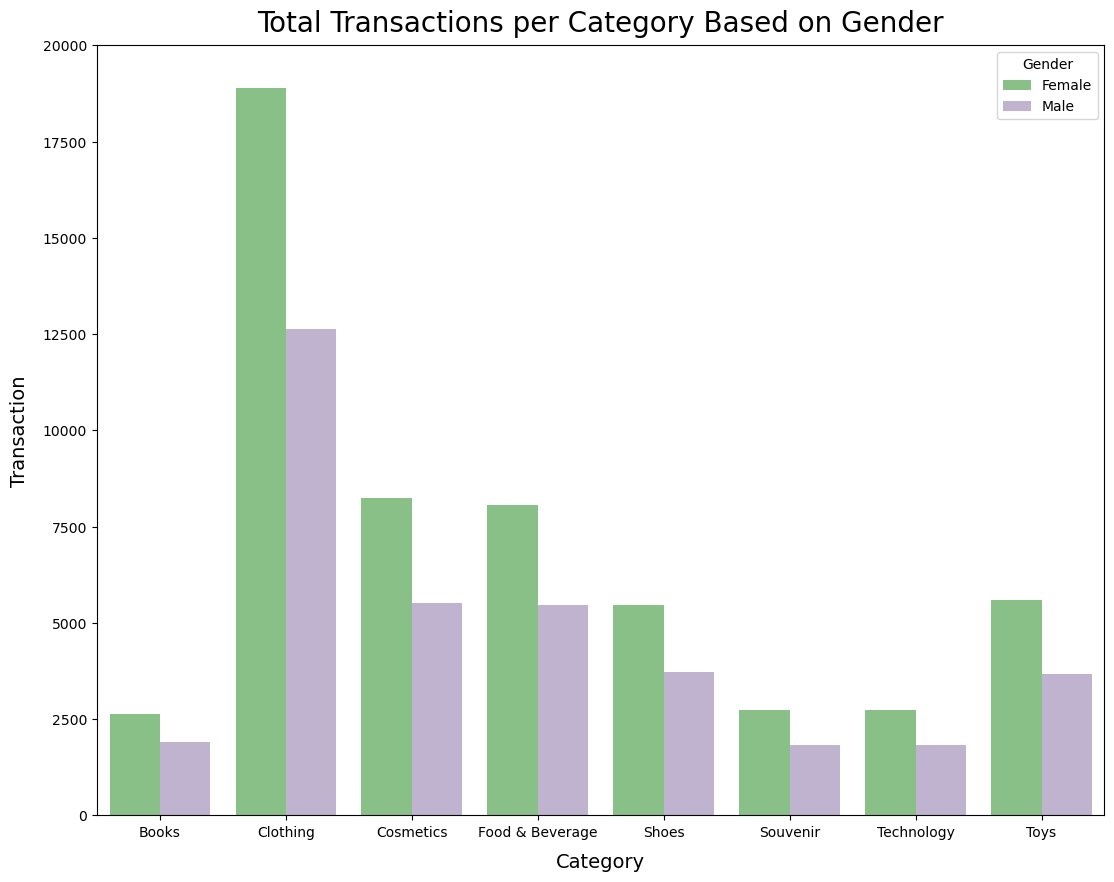

In [65]:
plt.figure(figsize = (13,10))
sns.barplot(data = data2_cat_gender, x = 'category', y = 'jumlah_transaksi', hue = 'gender', palette = 'Accent')
plt.legend(loc = 0 ,title = 'Gender', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

plt.ylim(0,20000)
plt.ylabel('Transaction', size = 14, labelpad = 10)
plt.xlabel('Category', size = 14, labelpad = 10)
plt.title('Total Transactions per Category Based on Gender', size = 20, pad = 10)

<b>Insight :
    
Berdasarkan grafik di atas dapat dilihat bahwa, transaksi yang dilakukan di setiap category didominasi oleh wanita.

### Comparison of Total Expense per Category Based on Gender

In [66]:
data2_cat_gender_payment = data2.groupby(['category','gender'])['total_payment'].sum().reset_index(name = 'total pembelanjaan')
data2_cat_gender_payment

,category,gender,total pembelanjaan
0,Books,Female,440501.40
1,Books,Male,320452.80
2,Clothing,Female,62627296.16
3,Clothing,Male,41731525.44
4,Cosmetics,Female,3691114.80
5,Cosmetics,Male,2493108.56
6,Food & Beverage,Female,461892.68
7,Food & Beverage,Male,315808.32
8,Shoes,Female,36137436.04
9,Shoes,Male,24932862.31


Text(0.5, 1.0, 'Total Expense per Category Based on Gender')

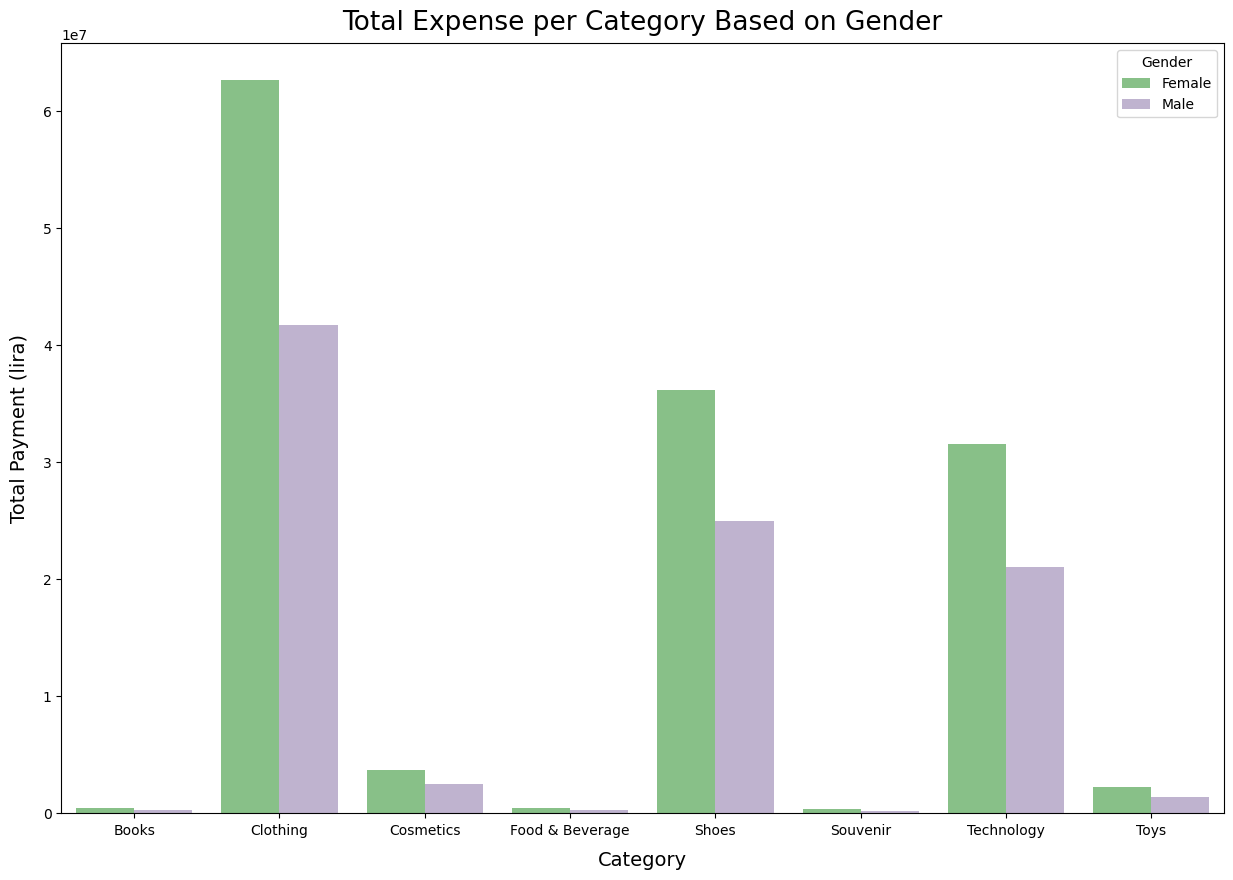

In [67]:
plt.figure(figsize = (15,10))
sns.barplot(data = data2_cat_gender_payment, x = 'category', y = 'total pembelanjaan', hue = 'gender', palette = 'Accent')
plt.legend(loc = 0 ,title = 'Gender', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

plt.ylabel('Total Payment (lira)', size = 14, labelpad = 10)
plt.xlabel('Category', size = 14, labelpad = 10)
plt.title('Total Expense per Category Based on Gender',size=19, pad = 10)

<b>Insight :

Dari grafik di atas dapat dilihat bahwa jumlah pembelanjaan (money expense) di setiap category didominasi oleh wanita.

### Comparison of Total Transactions Each Month by Year

In [68]:
data2_month_year= data2.groupby(['month','year'])['invoice_no'].nunique().reset_index(name = 'jumlah_transaksi')
data2_month_year

,month,year,jumlah_transaksi
0,1,2021,3835
1,1,2022,3847
2,2,2021,3407
3,2,2022,3447
4,3,2021,3813
5,3,2022,3947
6,4,2021,3724
7,4,2022,3763
8,5,2021,3848
9,5,2022,3849


Text(0.5, 1.0, 'Comparison of Total Transactions Each Month by Year')

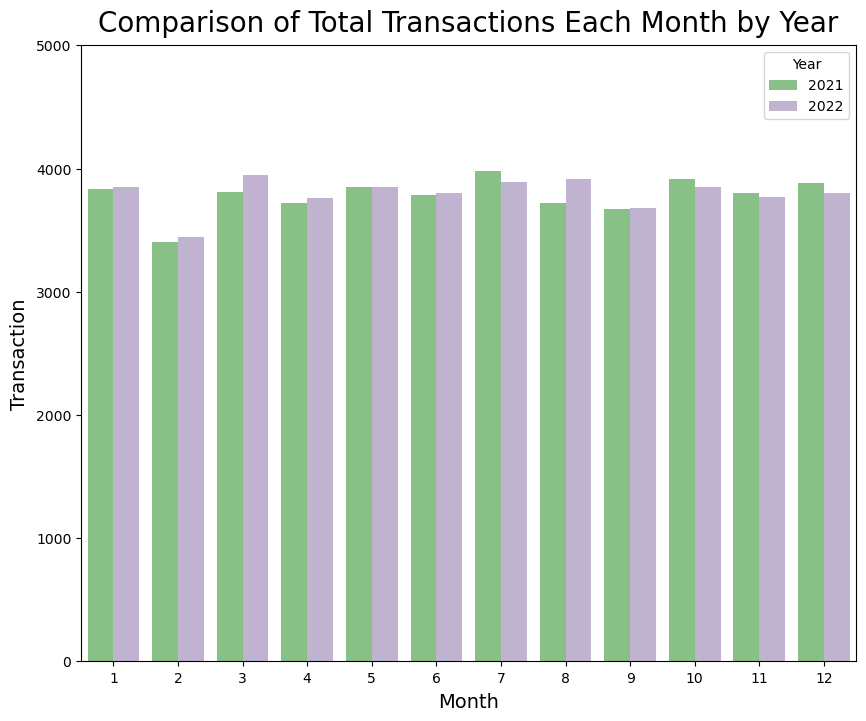

In [69]:
plt.figure(figsize = (10,8))
sns.barplot(data = data2_month_year, x = 'month', y = 'jumlah_transaksi', hue = 'year', palette="Accent")
plt.legend(loc = 0 ,title = 'Year', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

plt.ylim(0,5000)
plt.ylabel('Transaction', size = 14, labelpad = 5)
plt.xlabel('Month', size = 14, labelpad = 5)
plt.title('Comparison of Total Transactions Each Month by Year', size = 20, pad = 10)

<b>Insight:
1. Terjadi peningkatan transaksi yang cukup banyak dari tahun 2021 ke 2022 pada bulan maret dan agustus. Sedangkan pada bulan juli, oktober hingga desember terjadi penurunan transaksi.
2. Bulan januari, februari, april, mei, juni, september mengalami kenaikan tetapi tidak terlalu banyak.

### Comparison of Total Expense Each Month by Year

In [70]:
data2_month_year_money= data2.groupby(['month','year'])['total_payment'].sum().reset_index(name = 'jumlah belanja')
data2_month_year_money

,month,year,jumlah belanja
0,1,2021,9641614.62
1,1,2022,9764311.14
2,2,2021,8772315.22
3,2,2022,8344111.92
4,3,2021,9455359.38
5,3,2022,9986685.16
6,4,2021,9389541.54
7,4,2022,9326144.44
8,5,2021,9771756.97
9,5,2022,9947574.13


Text(0.5, 1.0, 'Total Expense Each Month by Year')

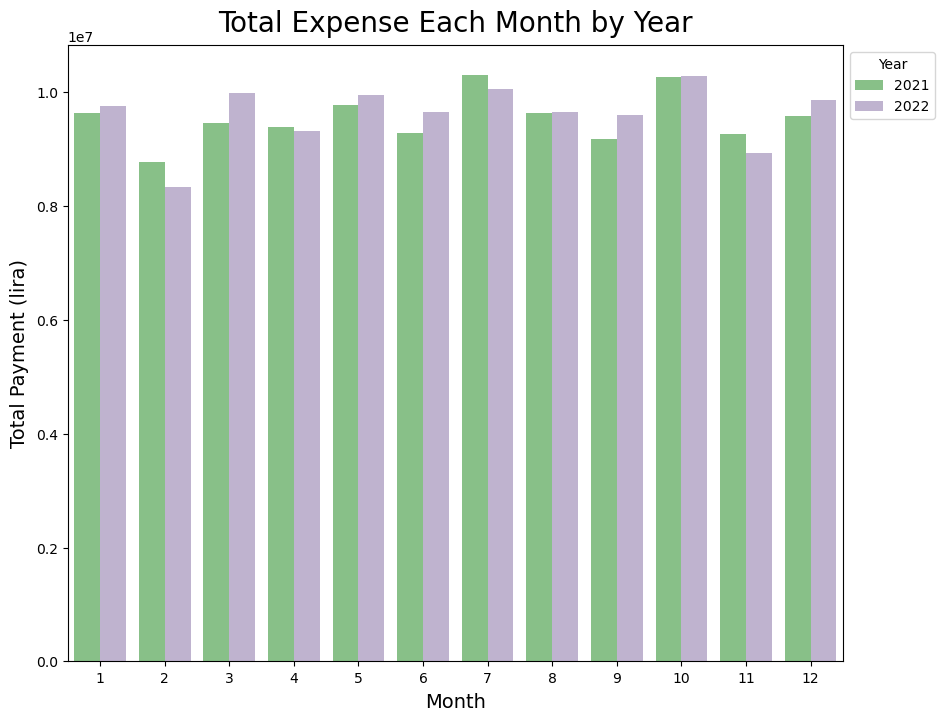

In [71]:
plt.figure(figsize = (10,8))
sns.barplot(data = data2_month_year_money, x = 'month', y = 'jumlah belanja', hue = 'year', palette = 'Accent')
plt.legend(loc = 0 ,title = 'Year', title_fontsize = 10, prop = {'size':10}, bbox_to_anchor = (1,1))

plt.ylabel('Total Payment (lira)', size = 14, labelpad = 5)
plt.xlabel('Month', size = 14, labelpad = 5)
plt.title('Total Expense Each Month by Year', size = 20, pad = 10)

<b>Insight :

Pada bulan januari, maret, mei, juni, agustus, September,oktober, dan desember terjadi peningkatan total belanja (money expense). Sedangkan pada bulan februari, april, dan november terjadi penurunan

In [72]:
data2['year'].unique()

array([2022, 2021], dtype=object)

In [73]:
data2021 = data2[(data2['year'] == 2021)]
data2022 = data2[(data2['year'] == 2022)]

In [74]:
month_count2021 = data2021.groupby(['month'])['invoice_no'].nunique().reset_index(name = 'jumlah_order')
month_count2021 = month_count2021.sort_values('jumlah_order', ascending = False).reset_index(drop = True)

Text(0, 0.5, 'Jumlah Transaksi')

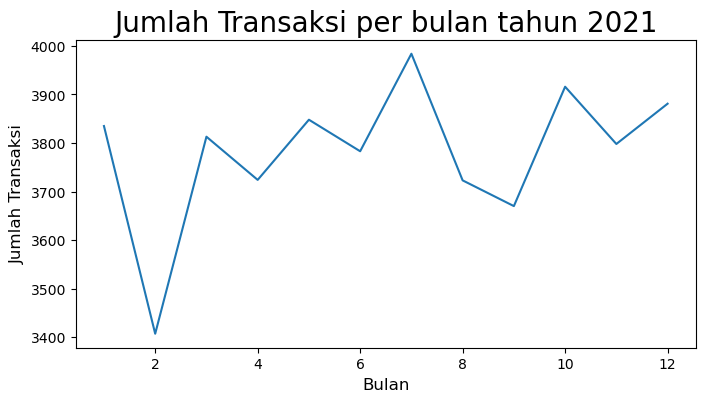

In [75]:
plt.figure(figsize=(8,4))

sns.lineplot(data=month_count2021, x = 'month', y= 'jumlah_order',  palette="Accent")
plt.title('Jumlah Transaksi per bulan tahun 2021', size = 20)
plt.xlabel('Bulan', size = 12)
plt.ylabel('Jumlah Transaksi', size = 12)

Hasil pengamatan : <br>
1. Dari grafik di atas dapat dilihat bahwa terjadi terjadi penurunan yang cukup signifikan pada bulan februari dan november.
2. Transaksi pada tahun 2021 tertinggi pada bulan juli, sedangkan terendah pada bulan februari.

In [76]:
month_count2022 = data2022.groupby(['month'])['invoice_no'].nunique().reset_index(name = 'jumlah_order')
month_count2022 = month_count2022.sort_values('jumlah_order', ascending = False).reset_index(drop = True)

Text(0, 0.5, 'Jumlah Transaksi')

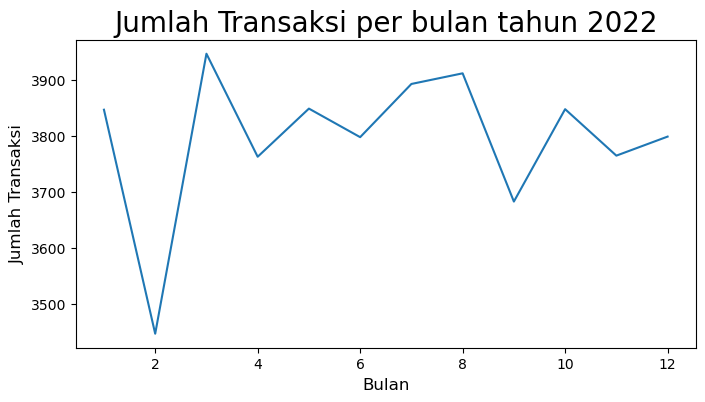

In [77]:
plt.figure(figsize=(8,4))

sns.lineplot(data=month_count2022, x = 'month', y= 'jumlah_order',  palette="Accent")
plt.title('Jumlah Transaksi per bulan tahun 2022', size = 20)
plt.xlabel('Bulan', size = 12)
plt.ylabel('Jumlah Transaksi', size = 12)

Hasil pengamatan : <br>
1. Dari grafik di atas dapat dilihat bahwa terjadi terjadi penurunan yang cukup signifikan pada bulan februari, september dan november.
2. Transaksi pada tahun 2022 tertinggi pada bulan maret, sedangkan terendah pada bulan februari.

In [78]:
month_count2 = data2.groupby(['month'])['invoice_no'].nunique().reset_index(name = 'jumlah_order')
month_count2 = month_count2.sort_values('jumlah_order', ascending = False).reset_index(drop = True)

Text(0, 0.5, 'Jumlah Transaksi')

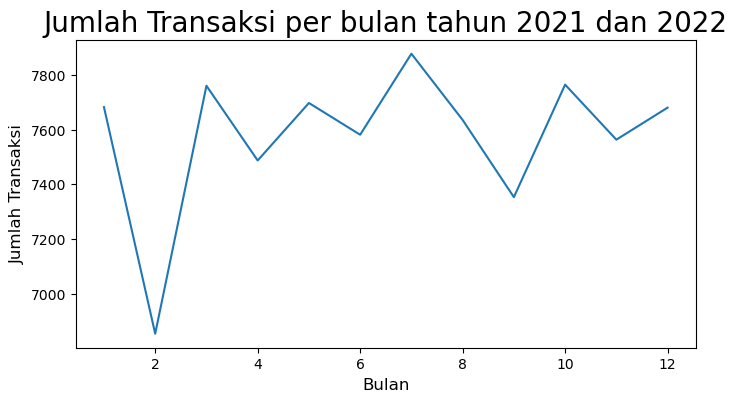

In [79]:
plt.figure(figsize=(8,4))

sns.lineplot(data=month_count2, x = 'month', y= 'jumlah_order',  palette="Accent")
plt.title('Jumlah Transaksi per bulan tahun 2021 dan 2022', size = 20)
plt.xlabel('Bulan', size = 12)
plt.ylabel('Jumlah Transaksi', size = 12)

Hasil pengamatan :<br>
1. Transaksi terendah selama tahun 2021-2022 ada pada bulan februari, sedangkan tertinggi pada bulan juli.
2. Pada bulan februari terjadi penurunan yang cukup signifikan.
3. Terjadi penurunan transaksi selama dua bulan berturut turut yaitu pada bulan agustus dan september.

### The Distribution of Prices in Each Category

Text(0, 0.5, 'Harga')

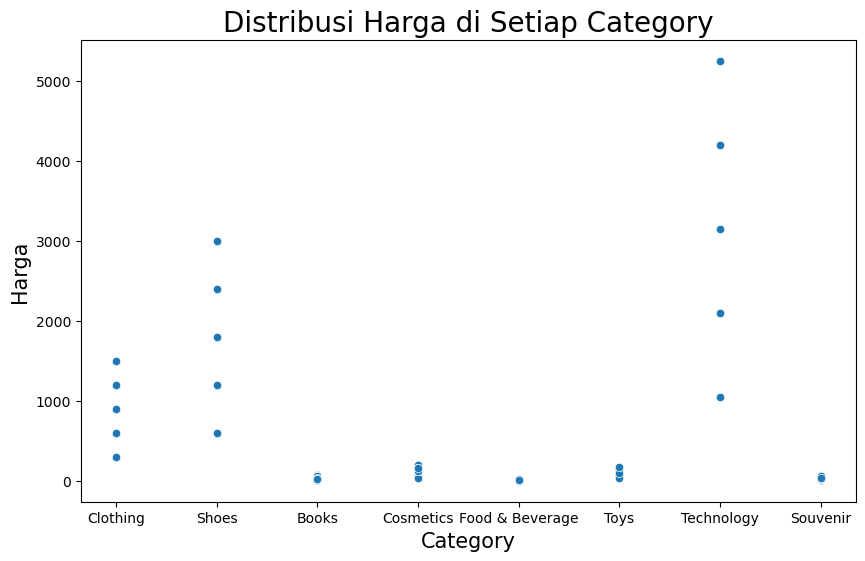

In [80]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'category', y= 'price', data=data2)

plt.title('Distribusi Harga di Setiap Category', size = 20)

plt.xlabel('Category', size = 15)
plt.ylabel('Harga', size = 15)

Hasil pengamatan:<br>
1. Terdapat beberapa produk yang memiliki harga bervariasi, yaitu pakaian, sepatu, dan technology.
2. Category technology relatif mahal, bahkan ada yang harganya jauh daripada harga category yang lain.
3. Category buku, kosmetik, food and beverage, mainan, dan souvenir harganya relatif murah


### The Distribution of Total Payments Based on Payment Methods

Text(0, 0.5, 'Total Payment')

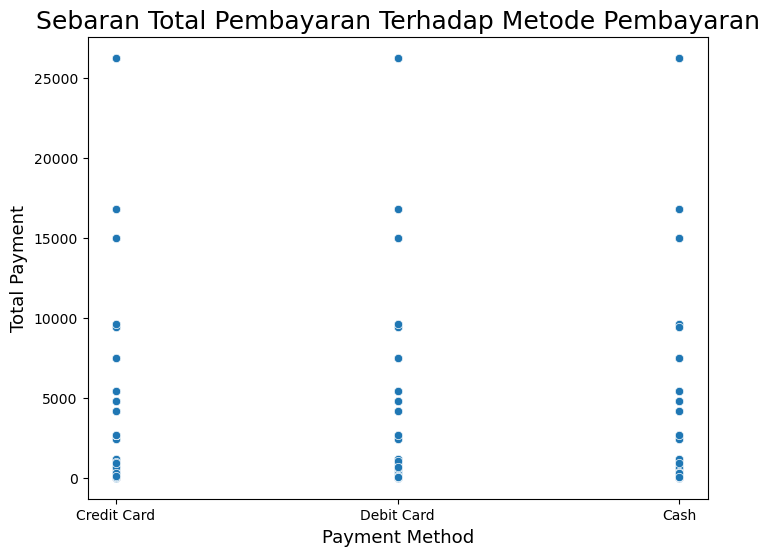

In [81]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'payment_method', y= 'total_payment', data=data2)

plt.title('Sebaran Total Pembayaran Terhadap Metode Pembayaran', size = 18)

plt.xlabel('Payment Method', size = 13)
plt.ylabel('Total Payment', size = 13)

<b> Insight : <br>
Tidak ada karakteristik total pembayaran tertentu terhadap metode pembayaran yang digunakan.


### Total Expenses Based on Category

Text(0.5, 1.0, 'Total Pembelanjaan (lira) per Category')

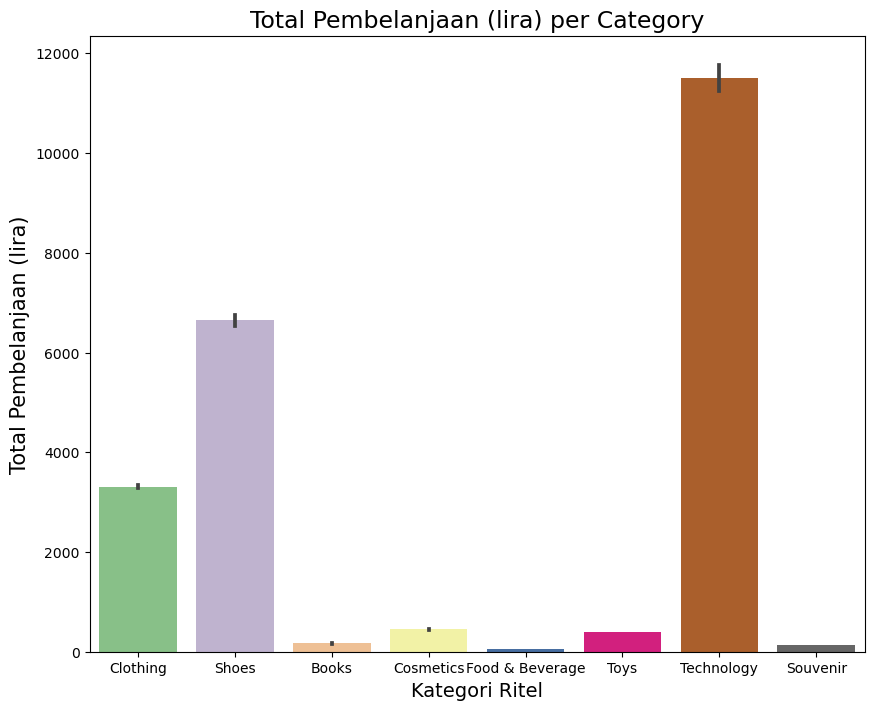

In [82]:
plt.figure(figsize = (10,8))
sns.barplot(data = data2, x = 'category', y = 'total_payment', palette="Accent")

plt.ylabel('Total Pembelanjaan (lira)', size = 15)
plt.xlabel('Kategori Ritel', size = 14)
plt.title('Total Pembelanjaan (lira) per Category', size = 17)

Total pembelanjaan (spending money) tertinggi ada pada kategori technology. Sedangkan total pembelanjaan buku, kosmetik, fodd and beverage, mainan, dan souvenir relative rendah.


In [83]:
new_column_order = ['invoice_no','day','month','year','gender','age','age_category','shopping_mall','category','quantity','price','total_payment','payment_method']

In [84]:
data2 = data2[new_column_order]

In [85]:
# export to csv
data2.to_csv("istanbul_mall_fix.csv", index=False)